In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn.cluster import KMeans
import datetime as dt

In [2]:
segment_directory = "data/segmentation.csv"
segment = pd.read_csv(segment_directory, header=0)


In [3]:
segment.head()

,CustomerId,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,8b4f8c66-7589-4734-8ada-2d42f60540ab,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,2151b2a2-8867-4986-9e00-449c2b4f89e9,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,3111db79-6721-4ec0-82b1-30b810649c5e,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,9cb76426-cc5d-4fa3-88bc-b92314b9f4e8,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,5d86caeb-2d53-44a7-b379-7f15f06ca821,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194


In [4]:
segment["Recency"] = pd.to_datetime(segment["Recency"]) # Переводим дату в понятный алгоритму кластеризации язык
segment["Recency"] = segment["Recency"].apply(lambda x: dt.datetime.toordinal(x))

In [5]:
segment["MonetaryNorm"] = (segment["Monetary"] - segment["Monetary"].mean())/segment["Monetary"].std() # Нормируем данные
segment["FrequencyNorm"] = (segment["Frequency"] - segment["Frequency"].mean())/segment["Frequency"].std()
segment["RecencyNorm"] = (segment["Recency"] - segment["Recency"].mean())/segment["Recency"].std()
segment["factor_1N"] = (segment["factor_1"] - segment["factor_1"].mean())/segment["factor_1"].std()
segment["factor_2N"] = (segment["factor_2"] - segment["factor_2"].mean())/segment["factor_2"].std()
segment["factor_3N"] = (segment["factor_3"] - segment["factor_3"].mean())/segment["factor_3"].std()
segment["factor_4N"] = (segment["factor_4"] - segment["factor_4"].mean())/segment["factor_4"].std()
# segment["MonetaryLoged"] = np.log(segment["MonetaryNorm"])
# segment["FrequencyLoged"] = np.log(segment["FrequencyNorm"])

Monetary


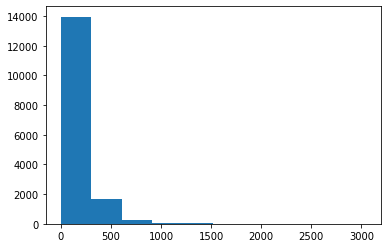

Recency


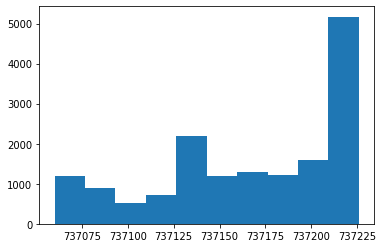

Frequency


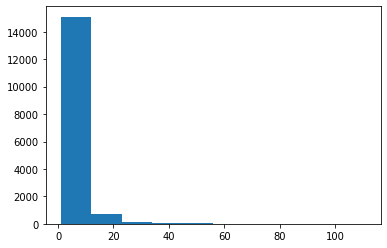

factor_1


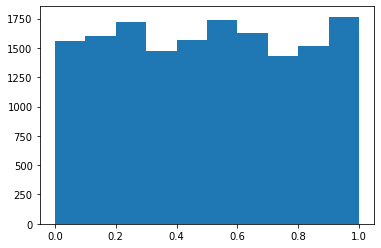

factor_2


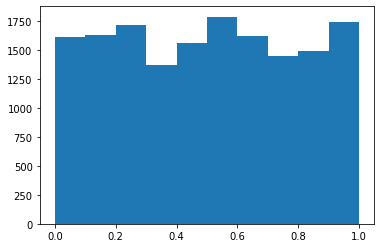

factor_3


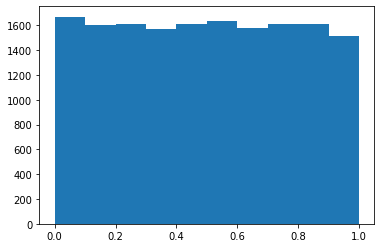

factor_4


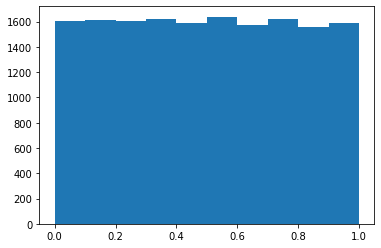

MonetaryNorm


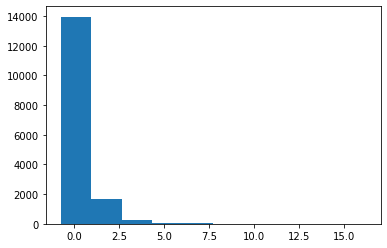

FrequencyNorm


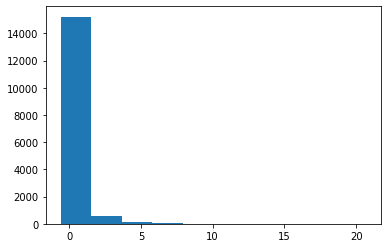

RecencyNorm


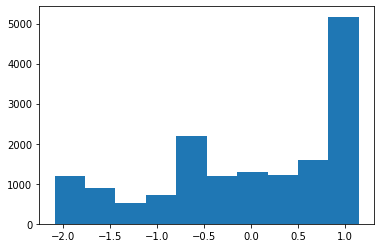

factor_1N


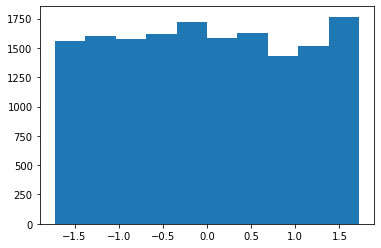

factor_2N


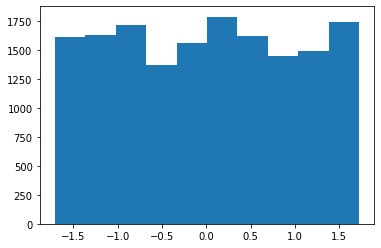

factor_3N


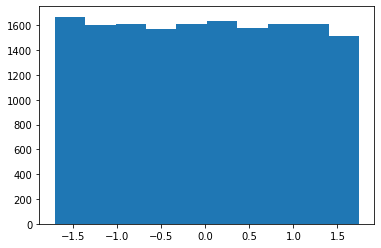

factor_4N


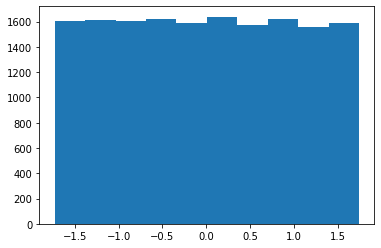

In [6]:
for col in segment.columns.values[1:]: # Проверяем распределения факторов
    print(col)
    plt.hist(segment[col])
    plt.show()

In [7]:
'''
Из гистограмм видно, что величины factor_1, 2, 3, 4 - равномерно распределены и никакой полезной информации, скорее всего, не несут.
Исключаем из рассмотрения.
'''

'\nИз гистограмм видно, что величины factor_1, 2, 3, 4 - равномерно распределены и никакой полезной информации, скорее всего, не несут.\nИсключаем из рассмотрения.\n'

In [8]:
needfactors = ['MonetaryNorm','RecencyNorm', 'FrequencyNorm'] # Берем наши нужные факторы

In [9]:
# pca = PCA(n_components=3) # Собственно, нам и PCA не нужен
# pca_result = pca.fit_transform(segment[needfactors].values)
# segment['pca-one'] = pca_result[:,0]
# segment['pca-two'] = pca_result[:,1] 
# segment['pca-three'] = pca_result[:,2]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [10]:
model = KMeans(n_clusters=4, random_state = 10) # Хочу 4 кластера

In [11]:
model.fit(segment[needfactors]) # Фитим модель
all_predictions = model.predict(segment[needfactors])

In [12]:
all_predictions

array([0, 0, 0, ..., 2, 2, 1])

In [13]:
collist = []
for i in range(len(all_predictions)):
    if all_predictions[i] == 0:
        collist.append('black')
    elif all_predictions[i] == 1:
        collist.append('blue')
    elif all_predictions[i] == 2:
        collist.append('red')
    elif all_predictions[i] == 3:
        collist.append('green')
    elif all_predictions[i] == 4:
        collist.append('purple')
    elif all_predictions[i] == 5:
        collist.append('orange')

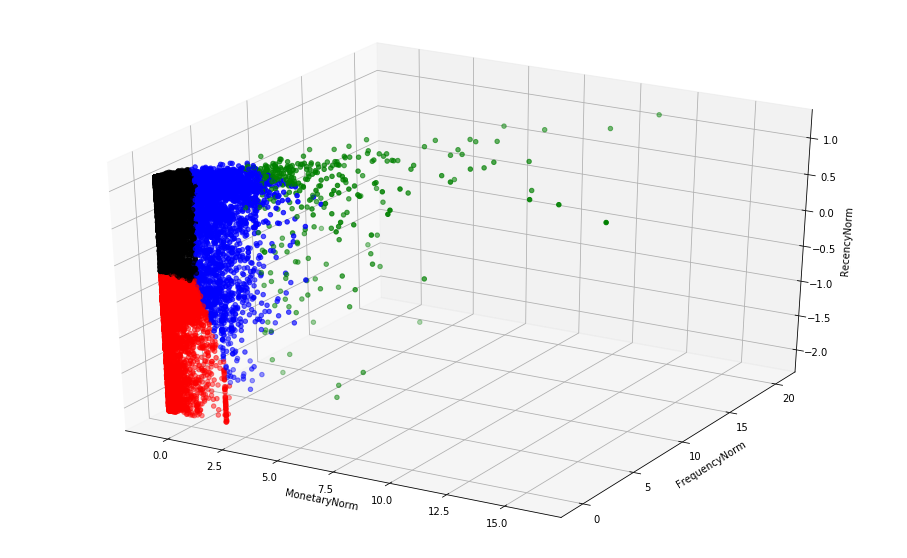

In [14]:
rndperm = list(range(1,1000))

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=segment["MonetaryNorm"], 
    ys=segment["FrequencyNorm"], 
    zs=segment["RecencyNorm"], 
    color = collist,
    cmap='tab10'
)
ax.set_xlabel("MonetaryNorm")
ax.set_ylabel("FrequencyNorm")
ax.set_zlabel("RecencyNorm")
plt.show()

In [15]:
segment1 = segment.copy()
segment1["Кластер"] = all_predictions
segment1["Цвет"] = collist

In [16]:
klustdf0 = segment1[segment1["Кластер"] == 0]
klustdf1 = segment1[segment1["Кластер"] == 1]
klustdf2 = segment1[segment1["Кластер"] == 2]
klustdf3 = segment1[segment1["Кластер"] == 3]

In [17]:
i = 1
for kl in [klustdf0, klustdf1, klustdf2, klustdf3]:
    print(f"Кластер {i}",", ", "Цвет: ", kl["Цвет"].unique(), "\n", kl[kl.columns.values[:8]].mean())
    i+=1

Кластер 1 ,  Цвет:  ['black'] 
 Monetary         70.585403
Recency      737202.748632
Frequency         2.799021
factor_1          0.503377
factor_2          0.497712
factor_3          0.491278
factor_4          0.499725
dtype: float64
Кластер 2 ,  Цвет:  ['blue'] 
 Monetary        370.572731
Recency      737196.287759
Frequency         8.268927
factor_1          0.493733
factor_2          0.500038
factor_3          0.493345
factor_4          0.491901
dtype: float64
Кластер 3 ,  Цвет:  ['red'] 
 Monetary         58.356311
Recency      737111.979324
Frequency         2.100263
factor_1          0.498869
factor_2          0.498136
factor_3          0.499999
factor_4          0.498499
dtype: float64
Кластер 4 ,  Цвет:  ['green'] 
 Monetary        818.937869
Recency      737203.406557
Frequency        29.560656
factor_1          0.500656
factor_2          0.476951
factor_3          0.517950
factor_4          0.524217
dtype: float64


In [18]:
'''
Кластер 1 - пользователи, которые платят не много и не часто, но, с большой вероятностью, являются активными,
так как последний раз платили недавно
Кластер 2 - среднестатистические пользователи, платят средне много, средне часто и средне недавно
Кластер 3 - возможно уже не активные пользователи, так как дата последнего платежа была давно
Кластер 4 - Шейхи. Платят много и часто.

Все factor_* дали плюс-минус среднее значение, значит равномерно распределены по всем пользователям. Не нужны.
'''

'\nКластер 1 - пользователи, которые платят не много и не часто, но, с большой вероятностью, являются активными,\nтак как последний раз платили недавно\nКластер 2 - среднестатистические пользователи, платят средне много, средне часто и средне недавно\nКластер 3 - возможно уже не активные пользователи, так как дата последнего платежа была давно\nКластер 4 - Шейхи. Платят много и часто.\n\nВсе factor_* дали плюс-минус среднее значение, значит равномерно распределены по всем пользователям. Не нужны.\n'